# Ch2 분석 과제: 아파트 전월세 실거래가 기초통계

## 데이터 불러오기

In [102]:
# 데이터 취합 패키지

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [35]:
# API 호출

ServiceKey = "Uyr5zV3o%2Fl2WtVGMUorieZvfag7FULKFgWkEI39Umy2fEJYGu2qq5SljgqwjOKbFaN2Ixh%2BnwbFp3zKYRH4Bvg%3D%3D"
gu_code = 11350
month = 202405
numOfRows = 1000

url = f"http://apis.data.go.kr/1613000/RTMSDataSvcAptRent/getRTMSDataSvcAptRent?serviceKey={ServiceKey}&LAWD_CD={gu_code}&DEAL_YMD={month}&numOfRows={numOfRows}"

result = urlopen(url)
house = BeautifulSoup(result, 'lxml-xml')
te = house.find_all("item")

In [36]:
# 데이터를 리스트로 취합 후 DataFrame 형태로 변경

data = []

for i in range(len(te)):
    deposit = te[i].deposit.string.strip()
    rent = te[i].monthlyRent.string.strip()
    built_yr = te[i].buildYear.string.strip()
    dong_name = te[i].umdNm.string.strip()
    apt_name = te[i].aptNm.string.strip()
    size = te[i].excluUseAr.string.strip()
    total = [deposit, rent, built_yr, dong_name, apt_name, size]
    data.append(total)

df = pd.DataFrame(data, columns = ["deposit", "rent", "built_yr", "dong_name", "apt_name", "size"])
df

,deposit,rent,built_yr,dong_name,apt_name,size
0,"40,000",0,1993,상계동,상계1차현대아파트,83.92
1,"28,000",0,1988,상계동,상계주공9(고층),61.52
2,"19,000",0,1988,상계동,한신2차,45.92
3,"48,500",0,2016,월계동,꿈의숲SKVIEW,84.93
4,"20,000",0,1989,상계동,벽산,46.8
...,...,...,...,...,...,...
995,"1,000",70,1988,상계동,상계주공3(고층),37.46
996,"12,648",0,2016,상계동,중계센트럴파크,49.9
997,"16,918",0,2016,상계동,중계센트럴파크,49.6
998,"12,648",0,2016,상계동,중계센트럴파크,49.9


## 데이터 전처리

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    1000 non-null   object
 1   rent       1000 non-null   object
 2   built_yr   1000 non-null   object
 3   dong_name  1000 non-null   object
 4   apt_name   1000 non-null   object
 5   size       1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [41]:
# 숫자 데이터 타입 변환

df['deposit'] = df['deposit'].str.replace(',','').astype(int)
df['rent'] = df['rent'].astype(int)
df['built_yr'] = df['built_yr'].astype(int)
df['size'] = df['size'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deposit    1000 non-null   int32  
 1   rent       1000 non-null   int32  
 2   built_yr   1000 non-null   int32  
 3   dong_name  1000 non-null   object 
 4   apt_name   1000 non-null   object 
 5   size       1000 non-null   float64
dtypes: float64(1), int32(3), object(2)
memory usage: 35.3+ KB


In [47]:
# 전월세전환율을 이용해 월세를 보증금으로 변환
# 2024년 5월 노원구 아파트 전월세전환율: 4.8%

df['total_deposit'] = df['deposit'] + df['rent']*12/0.048
df.tail()

,deposit,rent,built_yr,dong_name,apt_name,size,total_deposit
995,1000,70,1988,상계동,상계주공3(고층),37.46,18500.0
996,12648,0,2016,상계동,중계센트럴파크,49.90,12648.0
997,16918,0,2016,상계동,중계센트럴파크,49.60,16918.0
998,12648,0,2016,상계동,중계센트럴파크,49.90,12648.0
999,32100,40,1999,하계동,학여울청구,84.77,42100.0


In [49]:
# 면적을 평 단위로 변환

df['size_pyung'] = df['size']/3.33
df.head()

,deposit,rent,built_yr,dong_name,apt_name,size,total_deposit,size_pyung
0,40000,0,1993,상계동,상계1차현대아파트,83.92,40000.0,25.201201
1,28000,0,1988,상계동,상계주공9(고층),61.52,28000.0,18.474474
2,19000,0,1988,상계동,한신2차,45.92,19000.0,13.789790
3,48500,0,2016,월계동,꿈의숲SKVIEW,84.93,48500.0,25.504505
4,20000,0,1989,상계동,벽산,46.80,20000.0,14.054054


In [51]:
# 아파트 평당보증금

df['deposit_pyung'] = df['total_deposit']/df['size_pyung']
df.head()

,deposit,rent,built_yr,dong_name,apt_name,size,total_deposit,size_pyung,deposit_pyung
0,40000,0,1993,상계동,상계1차현대아파트,83.92,40000.0,25.201201,1587.225929
1,28000,0,1988,상계동,상계주공9(고층),61.52,28000.0,18.474474,1515.604681
2,19000,0,1988,상계동,한신2차,45.92,19000.0,13.789790,1377.831010
3,48500,0,2016,월계동,꿈의숲SKVIEW,84.93,48500.0,25.504505,1901.624868
4,20000,0,1989,상계동,벽산,46.80,20000.0,14.054054,1423.076923


In [53]:
# csv파일로 저장

df.to_csv('apt_deposit.csv')

## 기초통계량 분석

In [88]:
# 데이터 파일 불러오기

df = pd.read_csv('apt_deposit.csv')
df

,Unnamed: 0,deposit,rent,built_yr,dong_name,apt_name,size,total_deposit,size_pyung,deposit_pyung
0,0,40000,0,1993,상계동,상계1차현대아파트,83.92,40000.0,25.201201,1587.225929
1,1,28000,0,1988,상계동,상계주공9(고층),61.52,28000.0,18.474474,1515.604681
2,2,19000,0,1988,상계동,한신2차,45.92,19000.0,13.789790,1377.831010
3,3,48500,0,2016,월계동,꿈의숲SKVIEW,84.93,48500.0,25.504505,1901.624868
4,4,20000,0,1989,상계동,벽산,46.80,20000.0,14.054054,1423.076923
...,...,...,...,...,...,...,...,...,...,...
995,995,1000,70,1988,상계동,상계주공3(고층),37.46,18500.0,11.249249,1644.554191
996,996,12648,0,2016,상계동,중계센트럴파크,49.90,12648.0,14.984985,844.044890
997,997,16918,0,2016,상계동,중계센트럴파크,49.60,16918.0,14.894895,1135.825403
998,998,12648,0,2016,상계동,중계센트럴파크,49.90,12648.0,14.984985,844.044890


In [100]:
# 필요한 정보만 취합

df1 = df[['dong_name', 'apt_name', 'built_yr', 'size_pyung', 'total_deposit', 'deposit_pyung']]
df1.head()

,dong_name,apt_name,built_yr,size_pyung,total_deposit,deposit_pyung
0,상계동,상계1차현대아파트,1993,25.201201,40000.0,1587.225929
1,상계동,상계주공9(고층),1988,18.474474,28000.0,1515.604681
2,상계동,한신2차,1988,13.789790,19000.0,1377.831010
3,월계동,꿈의숲SKVIEW,2016,25.504505,48500.0,1901.624868
4,상계동,벽산,1989,14.054054,20000.0,1423.076923


In [124]:
# 그래프 패키지

import matplotlib.pyplot as plt
from matplotlib import rcParams, font_manager, rc
import seaborn as sns

# 한글 폰트

rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumBarunGothic'
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font', family=font_name)

In [186]:
# 평당보증금 기술통계량

from scipy import stats

x = df1['deposit_pyung']
x_mean = np.mean(x)
x_median = np.median(x)
x_mode = stats.mode(x)[0]
x_max = np.max(x)

deposit_desc = pd.DataFrame([[x_mean, x_median, x_mode, x_max]], columns=["mean", "median", "mode", "max"])
deposit_desc

,mean,median,mode,max
0,1570.704364,1537.216529,1079.142929,4126.616379


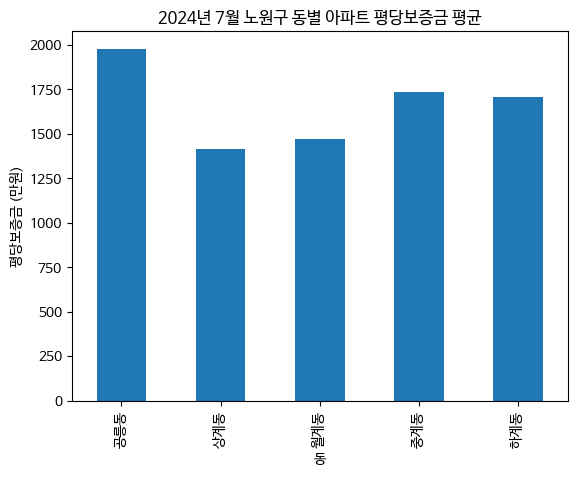

In [122]:
# 동별 평당보증금 평균 막대그래프

x = df1.groupby('dong_name')['deposit_pyung'].mean()
x.plot.bar()
plt.title("2024년 7월 노원구 동별 아파트 평당보증금 평균")
plt.xlabel('동')
plt.ylabel('평당보증금 (만원)')
plt.show()

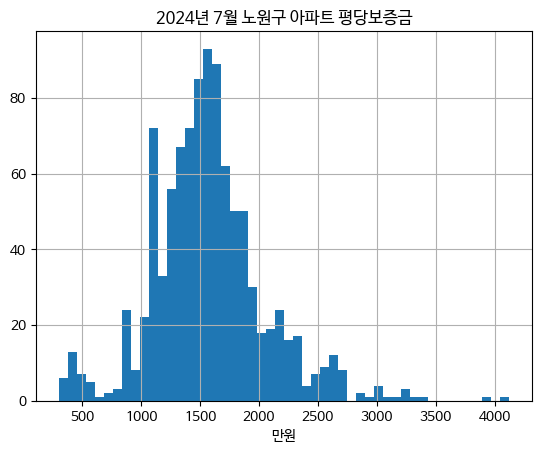

In [130]:
# 평당보증금 히스토그램

plt.hist(df1['deposit_pyung'], bins=50)
plt.title("2024년 7월 노원구 아파트 평당보증금")
plt.xlabel('만원')
plt.grid()
plt.show()

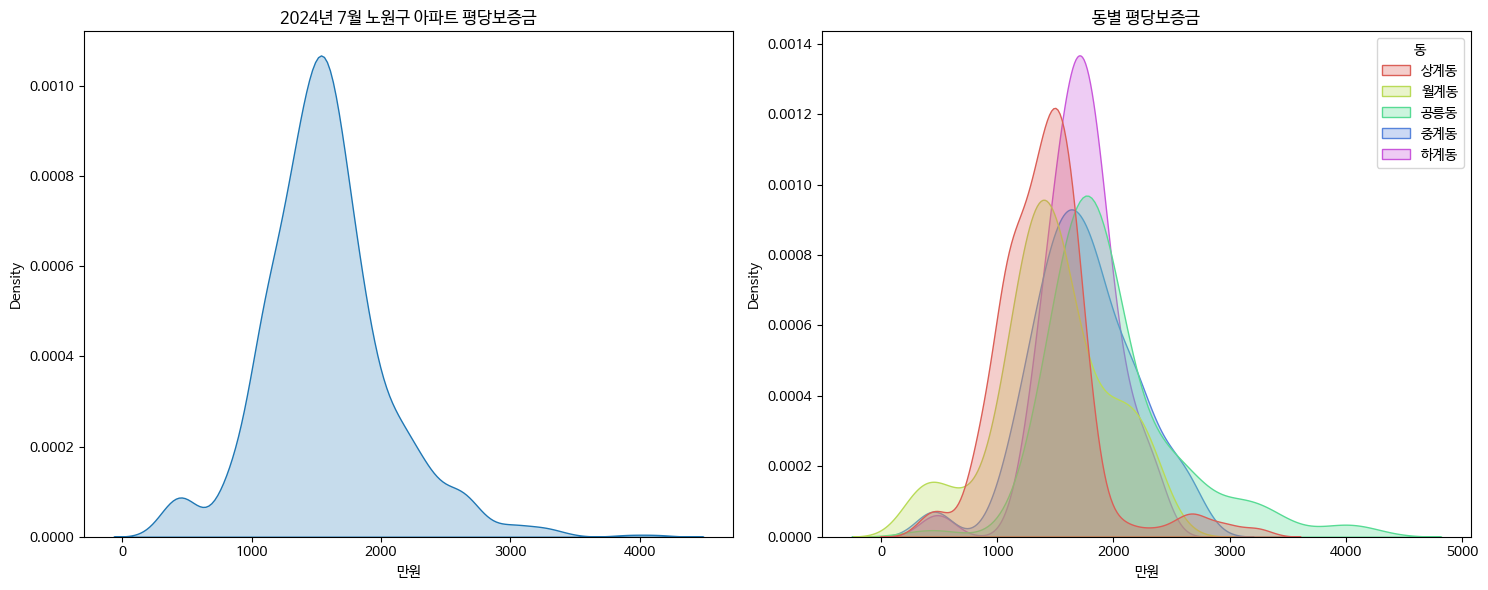

In [180]:
# 전체&동별 평당보증금 kde 그래프

fig, axes = plt.subplots(1, 2, tight_layout = True)
fig.set_size_inches(15,6)

sns.kdeplot(data=df1, x='deposit_pyung', fill=True, ax=axes[0])
sns.kdeplot(data=df1, x='deposit_pyung', hue='dong_name', fill=True, common_norm=False, palette='hls', alpha=.3, ax=axes[1])
axes[0].set_title("2024년 7월 노원구 아파트 평당보증금")
axes[1].set_title("동별 평당보증금")
axes[0].set_xlabel('만원')
axes[1].set_xlabel('만원')
axes[1].legend_.set_title('동')
plt.show()